In [29]:
from numpy import exp, linspace, random

def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)

In [30]:
from scipy.optimize import curve_fit

x = linspace(-10, 10, 101)
y = gaussian(x, 2.33, 0.21, 1.51) + random.normal(0, 0.5, x.size)

# init_vals = [1, 0, 1]  # for [amp, cen, wid]
# best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)

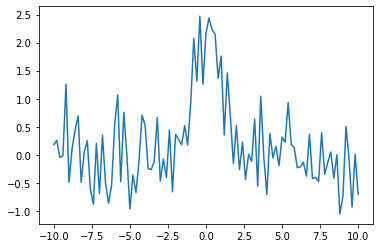

In [32]:
import matplotlib.pyplot as py
py.plot(x,y)

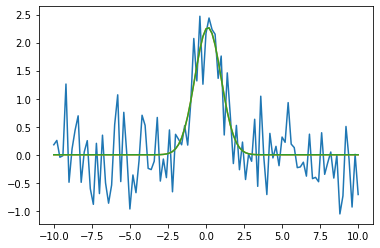

In [33]:
popt,_ = curve_fit(gaussian, x, y)
scfit = gaussian(x,popt[0], popt[1], popt[2])

from lmfit import Model
gmodel = Model(gaussian)
gmod = gmodel.fit(y, x=x, amp=popt[0], cen=popt[1], wid=popt[2])


py.plot(x,y)
py.plot(x, scfit, label='scipy fit')
py.plot(x, gmod.best_fit, label='lmfit')

In [20]:
gmod = gmodel.fit(y, x=x, amp=popt[0], cen=popt[1], wid=popt[2])

In [28]:
gmod.init_values


{'amp': 2.3271286290306814,
 'cen': 0.2115211602940339,
 'wid': 1.4878746045398508}

In [27]:
popt

array([2.32712863, 0.21152116, 1.4878746 ])

In [5]:
x_eval = linspace(0, 10, 201)
y_eval = gmodel.eval(params, x=x_eval)